In [13]:
!pip install git+https://github.com/WISDEM/RAFT.git
!pip install git+https://github.com/NREL/MoorPy.git
!pip install git+https://github.com/WISDEM/pyHAMS.git


  Cloning https://github.com/WISDEM/RAFT.git to /tmp/pip-req-build-4b1z7foy
  Running command git clone -q https://github.com/WISDEM/RAFT.git /tmp/pip-req-build-4b1z7foy
  Cloning https://github.com/NREL/MoorPy.git to /tmp/pip-req-build-c_6qs9g7
  Running command git clone -q https://github.com/NREL/MoorPy.git /tmp/pip-req-build-c_6qs9g7
  Cloning https://github.com/WISDEM/pyHAMS.git to /tmp/pip-req-build-5cvahjbn
  Running command git clone -q https://github.com/WISDEM/pyHAMS.git /tmp/pip-req-build-5cvahjbn


In [14]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [15]:
!conda --version

conda 4.12.0


In [21]:
!conda install wisdem
!conda upgrade matplotlib

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

# All requested packages already installed.


PackageNotInstalledError: Package is not installed in prefix.
  prefix: /usr/local
  package name: matplotlib




Found mean offets with with surge = 0.02 m and pitch = 0.00 deg.

--------- Natural frequencies and mode shapes -------------
Mode        1         2         3         4         5         6
Fn (Hz)    0.0081    0.0081    0.0506    0.0381    0.0381    0.0127

DOF 1      1.0000   -0.0129   -0.0000   -0.0002    0.9874   -0.0000
DOF 2     -0.0000   -0.9999   -0.0000    0.9873   -0.0001    0.1183
DOF 3      0.0000   -0.0000    1.0000    0.0000   -0.0000   -0.0000
DOF 4     -0.0000   -0.0005    0.0000   -0.1586    0.0000    0.0002
DOF 5     -0.0006    0.0000   -0.0000   -0.0000    0.1585    0.0000
DOF 6      0.0000    0.0001   -0.0000   -0.0000    0.0000    0.9930
-----------------------------------------------------------

--------------------- Running Case 1 ----------------------
[16, 0, 0, 'operating', 0, 'JONSWAP', 12, 6, 0]
Wind speed: 16 m/s, Aerodynamic power coefficient: 0.137


/usr/local/lib/python3.7/dist-packages/raft/raft_rotor.py:363: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p = np.array([-self.I_drivetrain, (dQ_dOm + self.kp_beta * dQ_dPi - self.Ng * kp_tau), self.ki_beta* dQ_dPi - self.Ng * ki_tau])


Found mean offets with with surge = 12.26 m and pitch = 3.21 deg.
Wind speed: 16 m/s, Aerodynamic power coefficient: 0.133
 Iteration 0, unconverged (largest change is 0.99270 >= 0.01)
 Iteration 1, unconverged (largest change is 0.35968 >= 0.01)
 Iteration 2, unconverged (largest change is 0.09092 >= 0.01)
 Iteration 3, unconverged (largest change is 0.01993 >= 0.01)
 Iteration 4, converged (largest change is 0.00419 < 0.01)
-------------------- Case 1 Statistics --------------------
Response channel     Average     RMS         Maximum
surge (m)            1.23e+01    6.19e-01    1.41e+01
sway (m)             7.31e-01    8.66e-05    7.31e-01
heave (m)           -1.37e+00    5.55e-01    2.98e-01
roll (deg)           8.34e-02    2.97e-05    8.35e-02
pitch (deg)          3.21e+00    2.37e-01    3.92e+00
yaw (deg)           -2.10e-01    8.56e-05   -2.10e-01
nacelle acc. (m/s)   0.00e+00    2.22e-01    0.00e+00
tower bending (Nm)   1.97e+08    5.70e+07    0.00e+00
rotor speed (RPM)    7.56

AttributeError: ignored

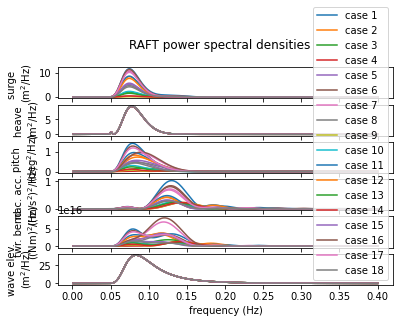

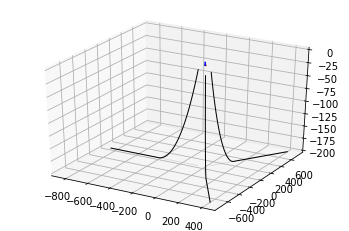

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import yaml
import raft

# open the design YAML file and parse it into a dictionary for passing to raft
with open('VolturnUS-S_example.yaml') as file:
    design = yaml.load(file, Loader=yaml.FullLoader)

# Create the RAFT model (will set up all model objects based on the design dict)
model = raft.Model(design)  

# Evaluate the system properties and equilibrium position before loads are applied
model.analyzeUnloaded()

# Compute natural frequencie
model.solveEigen()

# Simule the different load cases
model.analyzeCases(display=1)

# Plot the power spectral densities from the load cases
model.plotResponses()

# Visualize the system in its most recently evaluated mean offset position
model.plot(hideGrid=True)

plt.show()